## Step1: Reformat data for modeling

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sale = pd.read_csv('sales.csv')

In [3]:
sale.head()

,Date,Revenue,Category
0,2015/1/1,108632.40,Cars.go.com
1,2015/1/1,31494.02,Planes.go.com
2,2015/1/1,239376.48,Boats.go.com
3,2015/1/2,552064.80,Cars.go.com
4,2015/1/2,238344.12,Planes.go.com


In [4]:
sale.dtypes

Date         object
Revenue     float64
Category     object
dtype: object

In [5]:
#sum revenue 2015Q1
sale.groupby('Category').Revenue.sum()

Category
Boats.go.com      4736347.68
Cars.go.com      16757524.80
Planes.go.com    32529742.79
Name: Revenue, dtype: float64

In [6]:
revenue = pd.read_csv('revenue.csv')
profit = pd.read_csv('profit.csv')

In [7]:
revenue

,Category,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
0,Cars.go.com,6085063,5663582,5701994,5691910,5906352
1,Planes.go.com,32339403,34861524,36039564,34422242,45337642
2,Boats.go.com,4329578,4418088,4657184,4597765,5437214
3,Total,42754044,44943194,46398742,44711917,56681208


In [8]:
profit

,category,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
0,Cars.go.com,1217012.600,1132716.40,1140398.80,1138382.00,1181270.40
1,Planes.go.com,161697.015,174307.62,180197.82,172111.21,226688.21
2,Boats.go.com,86591.560,88361.76,93143.68,91955.30,108744.28
3,Total,1465301.175,1395385.78,1413740.30,1402448.51,1516702.89


In [10]:
revenue = revenue.melt(id_vars=['Category'], value_vars=['Q4 2013','Q1 2014','Q2 2014','Q3 2014','Q4 2014'])

In [11]:
profit = profit.melt(id_vars=['category'], value_vars=['Q4 2013','Q1 2014','Q2 2014','Q3 2014','Q4 2014'])

In [17]:
profit_df = profit.rename(columns={"variable":"date","value":"profit"})
revenue_df = revenue.rename(columns={"variable":"date","value":"revenue","Category":"category"})

In [18]:
profit.shape

(20, 3)

In [19]:
revenue.shape

(20, 3)

In [22]:
new_df = pd.merge(profit_df, revenue_df,  how='inner', left_on=['category','date'], right_on = ['category','date'])

In [23]:
new_df

,category,date,profit,revenue
0,Cars.go.com,Q4 2013,1217012.600,6085063
1,Planes.go.com,Q4 2013,161697.015,32339403
2,Boats.go.com,Q4 2013,86591.560,4329578
3,Total,Q4 2013,1465301.175,42754044
4,Cars.go.com,Q1 2014,1132716.400,5663582
5,Planes.go.com,Q1 2014,174307.620,34861524
6,Boats.go.com,Q1 2014,88361.760,4418088
7,Total,Q1 2014,1395385.780,44943194
8,Cars.go.com,Q2 2014,1140398.800,5701994
9,Planes.go.com,Q2 2014,180197.820,36039564


## Step2: SimpleEDA

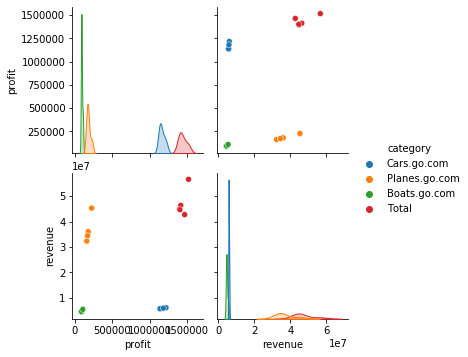

In [24]:
sns.pairplot(new_df,hue='category')

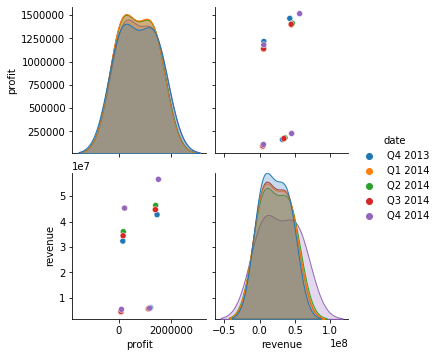

In [25]:
sns.pairplot(new_df,hue='date')

## Step3:Training/Fitting Model

In [27]:
X = new_df[["category","revenue"]]

In [28]:
X = pd.get_dummies(data=X)
X.head()

,revenue,category_Boats.go.com,category_Cars.go.com,category_Planes.go.com,category_Total
0,6085063,0,1,0,0
1,32339403,0,0,1,0
2,4329578,1,0,0,0
3,42754044,0,0,0,1
4,5663582,0,1,0,0


In [29]:
Y = new_df['profit']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 5)
(8, 5)
(12,)
(8,)


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
# print the intercept
print(model.intercept_)

536077.982899565


In [33]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
revenue,0.007555
category_Boats.go.com,-481093.125956
category_Cars.go.com,577341.271697
category_Planes.go.com,-632297.744398
category_Total,536049.598658


In [34]:
X_test

,revenue,category_Boats.go.com,category_Cars.go.com,category_Planes.go.com,category_Total
3,42754044,0,0,0,1
7,44943194,0,0,0,1
2,4329578,1,0,0,0
1,32339403,0,0,1,0
10,4657184,1,0,0,0
16,5906352,0,1,0,0
14,4597765,1,0,0,0
18,5437214,1,0,0,0


In [36]:
predictions = model.predict(X_test)
predictions

array([1395117.43188847, 1411655.59213483,   87693.10204444,
        148091.60550932,   90168.03547782, 1158039.40207254,
         89719.14849261,   96060.85284391])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


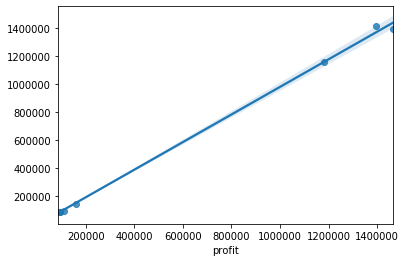

In [37]:
sns.regplot(y_test,predictions)

In [38]:
model.score(X_test,y_test)

0.9979178807884556

In [39]:
model.score(X_train,y_train)

0.9985726065581907

In [40]:
#sum revenue 2015Q1
df_pred = sale.groupby('Category').Revenue.sum().reset_index()

In [41]:
# df_pred['Date'] = "2014Q1"

In [42]:
new_df = df_pred.append(df_pred.sum(numeric_only=True), ignore_index=True)

In [43]:
new_df

,Category,Revenue
0,Boats.go.com,4736347.68
1,Cars.go.com,16757524.80
2,Planes.go.com,32529742.79
3,NaN,54023615.27


In [44]:
new_df.at[3,'Category']='Total'
# new_df.at[3,'Date']='2014Q1'

In [45]:
new_df

,Category,Revenue
0,Boats.go.com,4736347.68
1,Cars.go.com,16757524.80
2,Planes.go.com,32529742.79
3,Total,54023615.27


In [46]:
new_df = new_df.rename(columns = {"Category":"category","Revenue":"revenue","Date":"date"})

In [47]:
X_pred = pd.get_dummies(data=new_df)
# X.head()

In [48]:
X_test

,revenue,category_Boats.go.com,category_Cars.go.com,category_Planes.go.com,category_Total
3,42754044,0,0,0,1
7,44943194,0,0,0,1
2,4329578,1,0,0,0
1,32339403,0,0,1,0
10,4657184,1,0,0,0
16,5906352,0,1,0,0
14,4597765,1,0,0,0
18,5437214,1,0,0,0


In [49]:
# X_pred['Date_2014Q2'] = 0
# X_pred['Date_2014Q3'] = 0
# X_pred['Date_2014Q4'] = 0
# # 'Q4 2013','Q1 2014','Q2 2014','Q3 2014','Q4 2014'

In [50]:
X_pred

,revenue,category_Boats.go.com,category_Cars.go.com,category_Planes.go.com,category_Total
0,4736347.68,1,0,0,0
1,16757524.80,0,1,0,0
2,32529742.79,0,0,1,0
3,54023615.27,0,0,0,1


In [51]:
X_test.reset_index(drop=True)

,revenue,category_Boats.go.com,category_Cars.go.com,category_Planes.go.com,category_Total
0,42754044,0,0,0,1
1,44943194,0,0,0,1
2,4329578,1,0,0,0
3,32339403,0,0,1,0
4,4657184,1,0,0,0
5,5906352,0,1,0,0
6,4597765,1,0,0,0
7,5437214,1,0,0,0


In [52]:
model.predict(X_pred)

array([  90766.08569161, 1240015.71005848,  149529.54715255,
       1480254.57441918])

In [53]:
90766.08569161 + 1240015.71005848 + 149529.54715255

1480311.3429026399

## Prediction
Boats.go.com: 90766.08569161
Cars.go.com: 1240015.71005848
Planes.go.com: 149529.54715255
Total: 1480254.57441918

In [54]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1224.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.94e-10
Time:                        22:20:01   Log-Likelihood:                -136.55
No. Observations:                  12   AIC:                             283.1
Df Residuals:                       7   BIC:                             285.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.28

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
